In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

In [2]:
# # gw50m
# altitude = 50
# answer_location = (52.53962045830213, 13.419884901364885, 50)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
# d = []
# # rssi to distance with curve fit
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

# gw100m
altitude = 100
answer_location = (52.53962045830213, 13.419884901364885, 100)
source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
d = []
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)

# # gw100m_nobuilding
# altitude = 100
# answer_location = (52.53962045830213, 13.419884901364885, 200)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.58976692127023, -66.84978429622258, -65.43775615882458, -68.51723739248007, -69.34638664552159, -70.67158737502467, -69.47921756875596, -69.74188545126589, -71.33057463016215, -63.86118311152556])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

[511.8755465287958, 234.89856649485617, 197.5557485663918, 410.50477950801775, 305.73897592295174, 354.46186954189903, 295.9958660450461, 327.19722509936946, 394.29288508294167, 163.11736949587115]


In [3]:
[490.9845858372635, 239.1658724664293, 197.06693373599455, 269.9714723370692, 299.17153956786615, 352.6494853812043, 303.1263591036511, 324.5792879614826, 385.8966341254787, 162.56495453832926]

[490.9845858372635,
 239.1658724664293,
 197.06693373599455,
 269.9714723370692,
 299.17153956786615,
 352.6494853812043,
 303.1263591036511,
 324.5792879614826,
 385.8966341254787,
 162.56495453832926]

Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
N

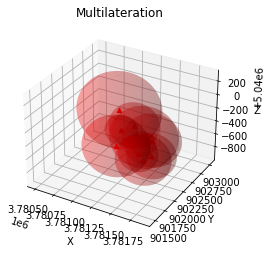

176.95128624094957


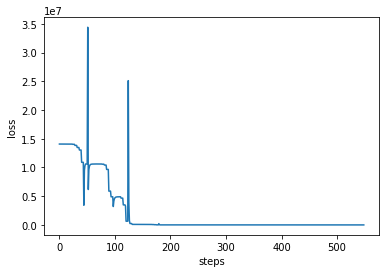

In [4]:
# multilateration program

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    print('Number of large errors:', np.sum(large_errors))
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Constraint function to ensure the estimated location has the same altitude as the wanted location
def altitude_constraint(xyz_receiver_estimated, altitude):
    lat, lon, alt = to_gps(*xyz_receiver_estimated)
    x, y, z = to_cartesian(lat, lon, altitude)
    return xyz_receiver_estimated[2] - z

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

# Starting GPS coordinates of the receiver (can be anywhere)
receiver_location = (40.048174, 10.134445, 0)

# Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
xyz_receiver = np.array(to_cartesian(*receiver_location))

# Perform multilateration to estimate the location of the receiver
result = minimize(error, xyz_receiver, args=(xyz_sources, d), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
xyz_receiver_estimated = result.x

# Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
receiver_location_estimated = to_gps(*xyz_receiver_estimated)

print('Receiver location:', receiver_location_estimated)
print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))


# Plot the sources and the estimated location of the receiver
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sources
for i in range(len(source_locations)):
    x, y, z = to_cartesian(*source_locations[i])
    ax.scatter(x, y, z, color='r', marker='^')

# Plot the estimated location of the receiver
x, y, z = to_cartesian(*receiver_location_estimated)
ax.scatter(x, y, z, color='b', marker='o')

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multilateration')

print(source_locations)
# Plot circles (or spheres) representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle (or sphere) in meters
    radius = d[i]
    # Get the Cartesian coordinates of the source
    x, y, z = to_cartesian(*source_locations[i])
    # Create a grid of points on the surface of the sphere
    # Sphere in 3D
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    X = x + radius*np.outer(np.cos(u), np.sin(v))
    Y = y + radius*np.outer(np.sin(u), np.sin(v))
    Z = z + radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.2)

plt.show()

# create a figure for error
fig = plt.figure()

plt.plot(loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
print(loss_array[-1])

# show the plot
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

# Plot the estimated location of the receiver
folium.Marker(location=receiver_location_estimated[:2], icon=folium.Icon(color='purple')).add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



In [5]:
# create every pattern of 4 or more beacons
import itertools

source_locations_iter = []
d_iter = []
for n in range(4,len(source_locations)+1):
	for source_location in itertools.combinations(source_locations, n):
	    source_locations_iter.append(list(source_location))
	    
for n in range(4,len(d)+1):
	for d_i in itertools.combinations(d, n):
	    d_iter.append(list(d_i))
print(source_locations_iter)
print(d_iter)

[[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.54022829654233, 13.424028618727982, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53768690920158, 13.423827698593255, 19)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53701243697258, 13.41926365424317, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53765506974833, 13.416535624425991, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715

100%|██████████| 848/848 [49:54<00:00,  3.53s/it]  


[[12.132414519474217, 147.31284903234962, 4, 14.087232693270847, 5.436748527492111, 47.26758520769023], [4.185224284785349, 6.894907350904744, 4, 6.623983304834083, 147.2724067512126, 15.62276462050559], [4.655699444728185, 4.929707793693207, 4, 6.666067810982012, 6.893013524648899, 16.99633676245953], [5.53973219779126, 7.106161248498384, 4, 5.254769443562532, 4.928353708124712, 20.175725858947374], [7.946162324544275, 88.59943129957706, 4, 13.035699090016292, 7.1042091574341155, 30.690866004931202], [25927.83396225825, 26174.07149371496, 4, 204.85083667922052, 88.5751012391536, 103709.335849033], [4.556602441692135, 5.525596703382578, 4, 6.59551153073494, 26167.431017215255, 16.40827626687352], [27.375912791886712, 93.49143824135311, 4, 26.837011472454243, 5.524078965160136, 107.77794654522208], [261266.17113583896, 261511.1026971966, 4, 181.76100133584106, 93.46576508547328, 1045062.6845433558], [29.66673595817486, 92.81415526721759, 4, 29.391445881047296, 298721.82938434195, 117.10

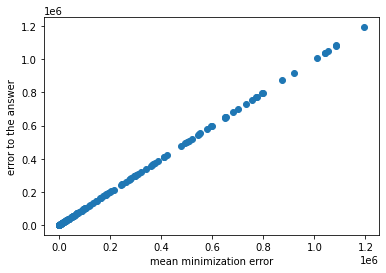

In [6]:
# multilateration with every patterns
from tqdm import tqdm

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    # print('Number of large errors:', np.sum(large_errors))
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Constraint function to ensure the estimated location has the same altitude as the wanted location
def altitude_constraint(xyz_receiver_estimated, altitude):
    lat, lon, alt = to_gps(*xyz_receiver_estimated)
    x, y, z = to_cartesian(lat, lon, altitude)
    return xyz_receiver_estimated[2] - z

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

xyz_receiver_estimated_list = []
receiver_locations_estimated = []
error_answer_minimization = []

for i in tqdm(range(len(d_iter))):

    source_locations = source_locations_iter[i]
    distance = d_iter[i]

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, distance), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
    xyz_receiver_estimated = result.x
    xyz_receiver_estimated_list.append(xyz_receiver_estimated)

    error_answer = np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated)
    error_answer_2d = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2])))
    error_answer_minimization.append([np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d, loss_array[-1]])
    
    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)
    receiver_locations_estimated.append(receiver_location_estimated)

    # print('Receiver location:', xyz_receiver_estimated)
    # print('Receiver location:', receiver_location_estimated)
    # print('error', np.sum(errors_array[-1]))

print(error_answer_minimization)
error_answer_minimization.sort(key=lambda item: item[0])
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error")
plt.ylabel("error to the answer")
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

for i in range(len(receiver_locations_estimated)):
# Plot the estimated location of the receiver
    folium.Marker(location=receiver_locations_estimated[i][:2], icon=folium.Icon(color='purple'), tooltip=f'Point {i}').add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



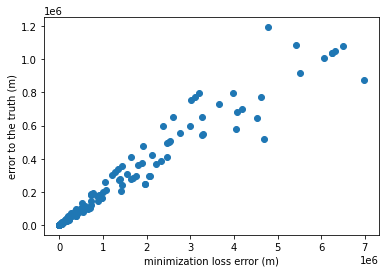

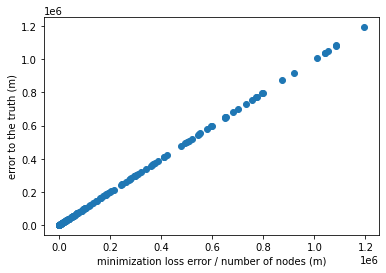

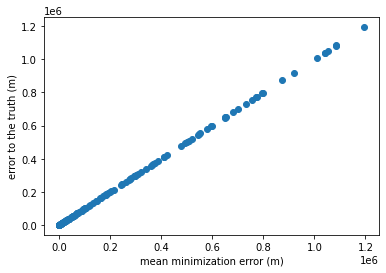

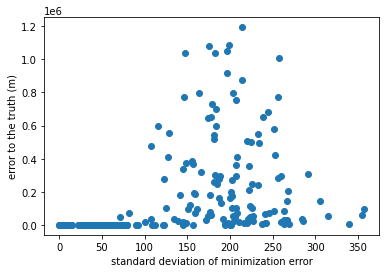

[]
[[4.034231706774171, 5.420272406944831, 5.193875889630166, 5.7459568129816665, 8.203415200025718, 1.534589542352346, 7.663248622013083, 5.184381787070382, 7.453254739021481, 6.853607559604063, 4.661640884231871, 4.792753683592173, 3.810885769231899, 2.5777917451934527, 2.482008719673204, 5.623026746458156, 8.461214339386903, 6.155078935263695, 6.267687550818725, 9.971653841263493, 4.988752333225817, 3.3308677225941508, 2.0534963336252328, 2.7017108679998505, 4.3312775837733595, 2.8950506037837243, 4.528818056551149, 8.31578210633969, 0.22656218758666424, 7.569583135045323, 8.272642223405034, 1.4685338218713178, 0.9984973795840425, 9.465184559876365, 7.355810368244669, 20.47653300138521, 7.456884689368592, 7.5931739868335075, 4.181052416572879, 8.406752840531981, 8.156979083613809, 6.777136606294202, 2.487092083968136, 6.493416746784838, 3.9438416445054365, 9.91120811766711, 22.88076351131458, 19.85425628124887, 5.180852531824962, 6.221433854488099, 4.995412114230494, 8.1383544317210

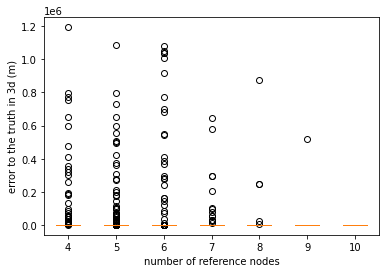

[]
[[87020.04482673973, 5.179429409711914, 6.3383296008883185, 3.1769941909272656, 8.404443533312822, 4.527574053804021, 400128.9469402507, 7.353789598307255, 1.5802745533540468, 300050.42374531884, 54772.376270817185, 9.462584336944806, 7.585155362204786, 4.660360408896611, 7.567503803779863, 8.154738436038883, 0.22649995243973972, 5.192449267492562, 6.153388308299204, 69375.95635248472, 12.848675868030723, 5.193475597571924, 2.6341092126638093, 7.451207430065518, 7.661143597204777, 8.657682793802982, 3.809838997304401, 6.775274831531241, 1.5341679635076118, 4.7914372202409545, 2.8942553407735523, 3.3402397326676185, 8.207024219997008, 3.9427583621910163, 36859.586174748794, 797966.9287633522, 2.6888155856528715, 4.179903950671152, 9.968914495045713, 7.45483635948802, 362503.8716295036, 5.418783569015113, 2.481326969547506, 400.1200716990591, 4.0331235946918484, 153.4668069409102, 56.070264861329406, 9.60608899687235, 4.329863026207592, 2.052932283642114, 4.987382049756435, 6.49163313

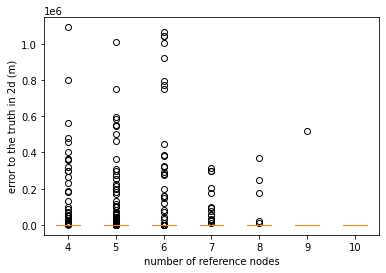

[]
[[87020.04482673973, 5.179429409711914, 6.3383296008883185, 3.1769941909272656, 8.404443533312822, 4.527574053804021, 400128.9469402507, 7.353789598307255, 1.5802745533540468, 300050.42374531884, 54772.376270817185, 9.462584336944806, 7.585155362204786, 4.660360408896611, 7.567503803779863, 8.154738436038883, 0.22649995243973972, 5.192449267492562, 6.153388308299204, 69375.95635248472, 12.848675868030723, 5.193475597571924, 2.6341092126638093, 7.451207430065518, 7.661143597204777, 8.657682793802982, 3.809838997304401, 6.775274831531241, 1.5341679635076118, 4.7914372202409545, 2.8942553407735523, 3.3402397326676185, 8.207024219997008, 3.9427583621910163, 36859.586174748794, 797966.9287633522, 2.6888155856528715, 4.179903950671152, 9.968914495045713, 7.45483635948802, 362503.8716295036, 5.418783569015113, 2.481326969547506, 400.1200716990591, 4.0331235946918484, 153.4668069409102, 56.070264861329406, 9.60608899687235, 4.329863026207592, 2.052932283642114, 4.987382049756435, 6.49163313

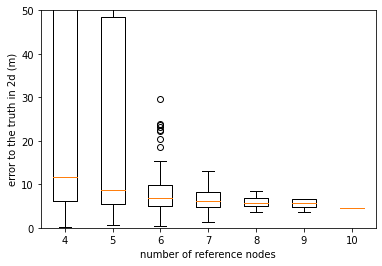

[]
[[0.5598198355352864, 0.7651811470649506, 1.006145385353669, 1.0166913672413855, 1.03548485427212, 1.1794100128847447, 1.2550213145276956, 1.381053612930664, 1.5947847547403242, 1.610421902996066, 1.6280750886372743, 1.6289544478983018, 1.7120648973765213, 1.7178495882385292, 1.7319231675853146, 1.779353411973986, 1.8942043570878226, 1.947810282075693, 1.9588080685772056, 2.1528958991903906, 2.227859288452727, 2.2347851883067307, 2.239663928219173, 2.2452333423654096, 2.353653623899973, 2.400576593437542, 2.4564631423993077, 2.578916660548451, 2.7275806243384153, 2.7887702333111477, 2.8455653321328356, 2.8539158114659458, 2.86146676352287, 2.8807100388046365, 2.971257507329014, 2.9786228367263945, 3.0360095824639046, 3.059382007518245, 3.073535626830342, 3.0821947386826167, 3.15181966445747, 3.1568844328017107, 3.2603923723709514, 3.2680642607488366, 3.3014832752640686, 3.343859741015166, 3.3651041337710836, 3.3736547972762523, 3.4370913187379557, 3.460891424802945, 3.52018599458866

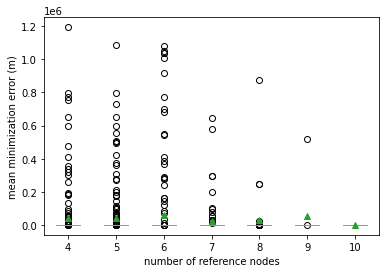

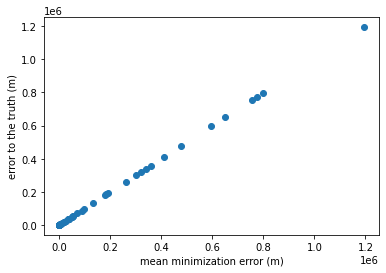

In [7]:
# visualization of multilateration with every pattern
# the relation between error to the truth and mean minimization error, number of reference nodes
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5]/item[2] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error / number of nodes (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("standard deviation of minimization error")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][1])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 3d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.ylim(0, 50)
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][0])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7], showmeans=True)
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("mean minimization error (m)")
plt.show()


error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization if item[2]==4], [item[1] for item in error_answer_minimization if item[2]==4])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")  
plt.show()

(array([738.,   7.,   6.,   4.,   7.,   6.,   2.,   3.,   6.,   1.,   2.,
          1.,   1.,   2.,   1.,   4.,   2.,   1.,   0.,   0.,   3.,   1.,
          1.,   3.,   3.,   2.,   1.,   0.,   1.,   1.,   2.,   1.,   1.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,
          0.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   3.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.26562188e-01, 1.19406689e+04, 2.38811112e+04, 3.58215535e+04,
        4.77619958e+04, 5.97024381e+04, 7.16428804e+04, 8.35833227e+04,
        9.55237651e+04, 1.07464207e+05, 1.19404650e+05, 1.31345092e+05,
        1.43285534e+05, 1.55225977e+05, 1.67166419e+05, 1.79106861e+05,
        1.91047304e+05, 2.0298

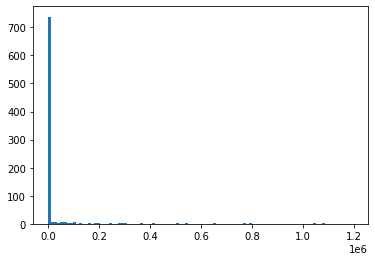

In [8]:
plt.hist([item[1] for item in error_answer_minimization], bins=100)

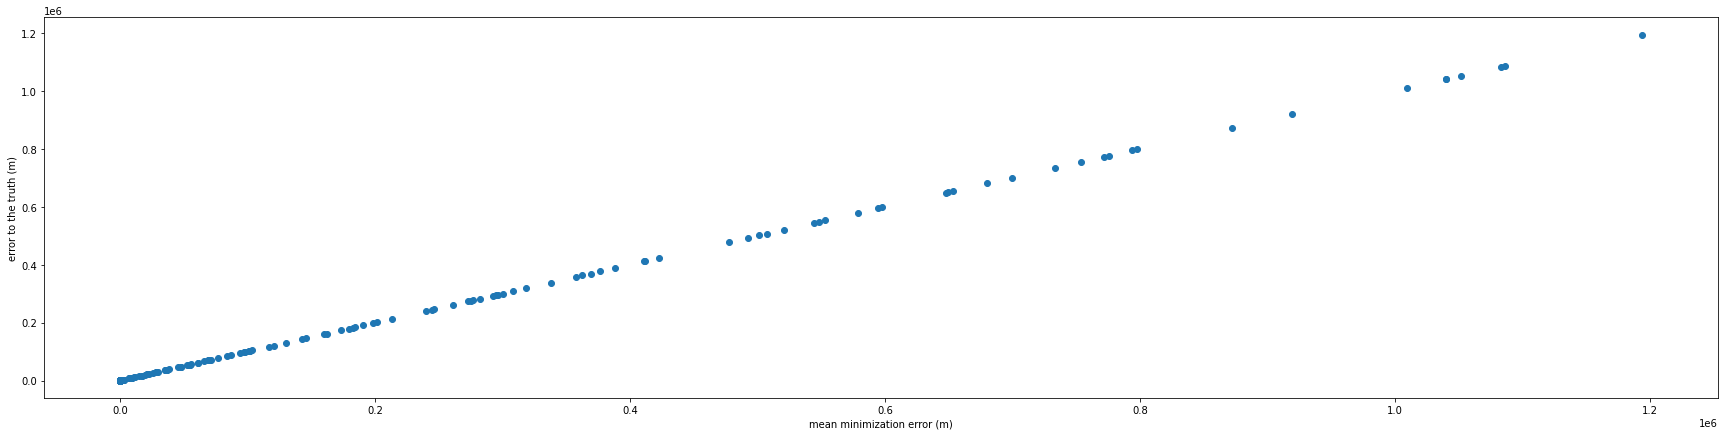

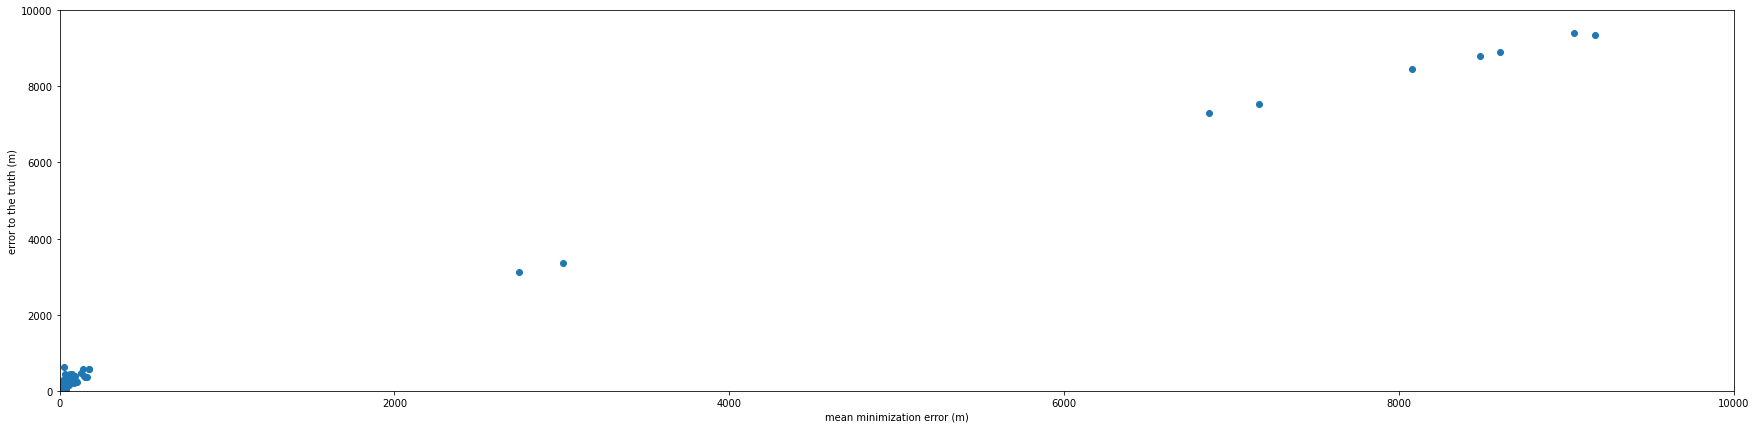

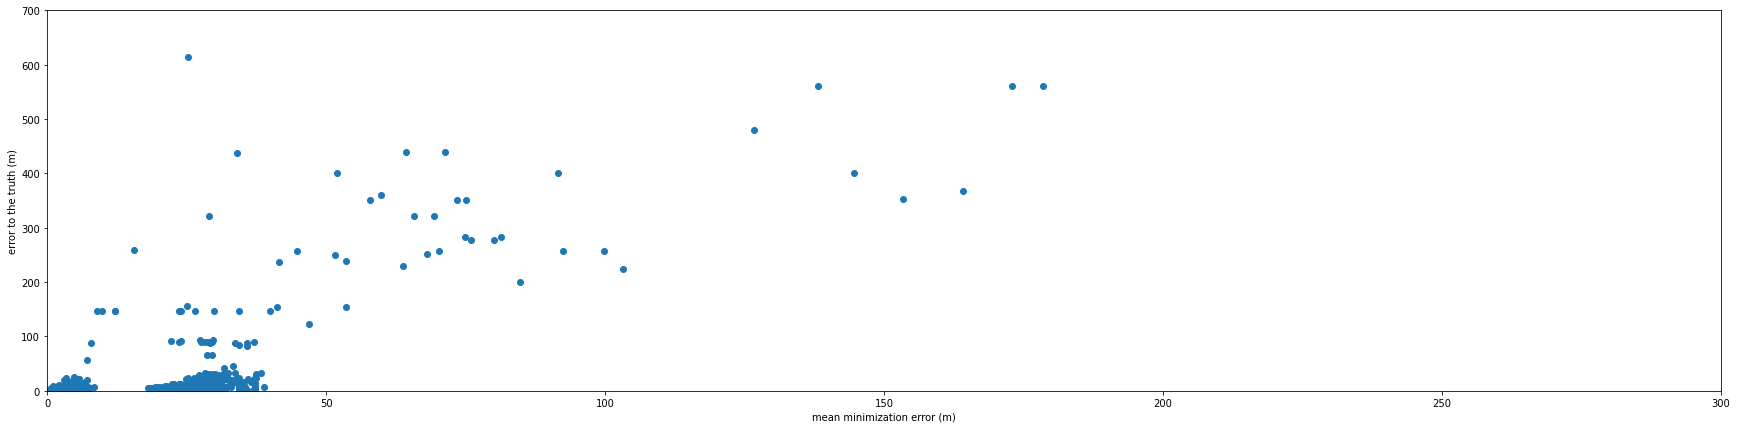

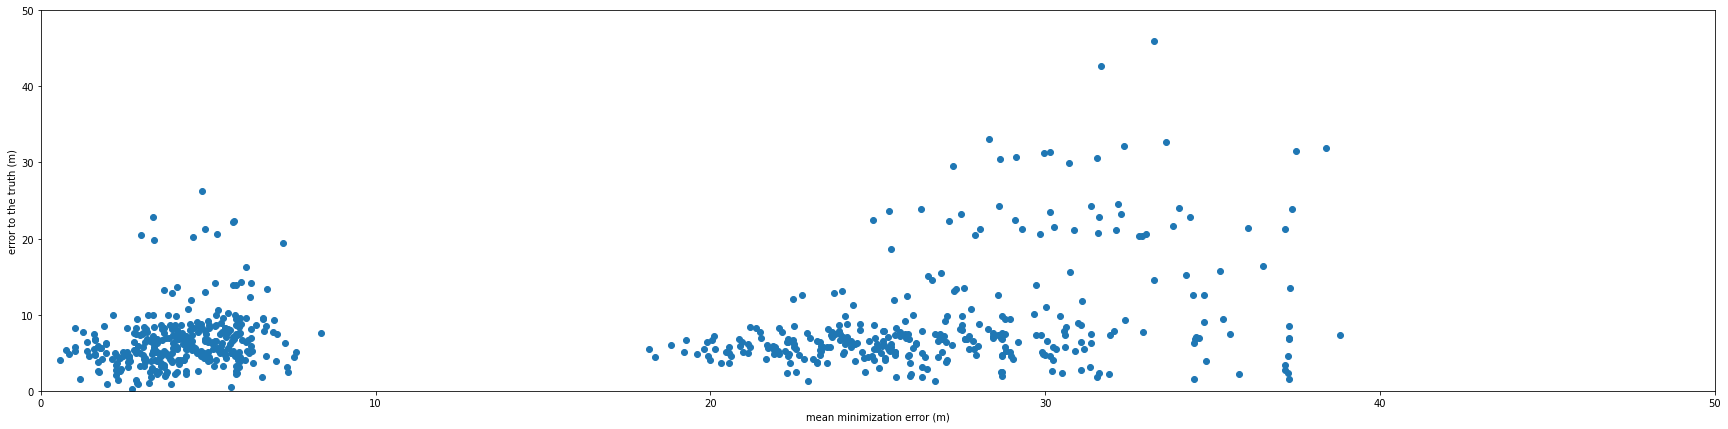

In [9]:
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

In [10]:
# [np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d]
for i in range(len(error_answer_minimization)):
    if error_answer_minimization[i][2] == 9:
        print(error_answer_minimization[i])

[4.879862405702735, 5.008876897234345, 9, 5.2324559164036435, 4.568072219295059, 40.01097694964866]
[18.33308960787912, 4.50295502015553, 9, 42.28237500910699, 6.6430496534902606, 161.33892675397712]
[18.822067304415036, 5.9748685584905425, 9, 41.8371811598061, 5.542860113136674, 165.24171730499577]
[19.268852403669946, 6.72337686130654, 9, 41.85325575433356, 5.9732274059513415, 169.26173981662242]
[19.59550771040738, 4.856259542465323, 9, 41.90233404285505, 6.721530075123559, 172.64161273871196]
[19.901870755613132, 6.449164808581412, 9, 41.77606554572145, 5.007501046096247, 174.92249106485085]
[19.928634247015594, 4.569327323346629, 9, 41.967664317993645, 520523.46332829434, 175.72072438233937]
[20.034001126671726, 6.644874873796927, 9, 41.58468606163707, 6.447393330370995, 176.1167492836695]
[20.128166302800437, 5.5443830567119425, 9, 41.7494419323719, 3.6752649987249253, 176.84177563837784]
[520205.82360651926, 520541.2183290915, 9, 180.71219768123703, 4.854925642087085, 4681847.91